# <center>Células estocásticas</center>

In [1]:
using PyPlot

INFO: Loading help data...


###El chiste de este proyecto es ver cuando tiene sentido ver las reacciones que suceden en las celulas, que normalmente tienen pocos componentes, como procesos estocásticos en lugar de deterministas.

###Para esto vamos a ver un modelo sencillo en el que se tiene una concentración de componentes de una sola molécula [M] por 'monomer'. Estos se convierten en componentes de dos moléculas (cuya concentración será [D] por 'dimer') con taza de conversión $k_b$. La taza para que regresen a ser unimolculares será $k_u$.

###La reacción a modelar está resumida en el siguiente diagrama de Petri, donde las flechas entrantes a un círculo indican resultado de una reacción y salientes el componente entrante de la reacción.

<img src="petri.png">

###Primero analizamos el caso "determinista":
###Para que M tambien sea el numero de monómeros en la célula asumiremos de ahora en adelante que nuestra unidad de concentración esta dada en nanomoles. Usando esto, la ecuación diferencial que rige el cambio en M es: $$\frac{\delta M}{\delta t}=2 k_u D - k_b M²$$

###Para que haya equilibrio queremos que la derivada sea igual a 0, si ademas usamos que la concentración total de moleculas es $N=M+2D$, obtenemos que $ M=\sqrt{1+2N}-1 $

###Ahora veamos como se comporta la solución numérica a esta ecuación diferencial. Primero resolvamos para 90 moléculas. En este casa la solución de equilibrio es $M=\sqrt{1+2*90}-1=12.4536$

In [2]:
using ODE #Importamos el paquete para resolver ODE's de Julia

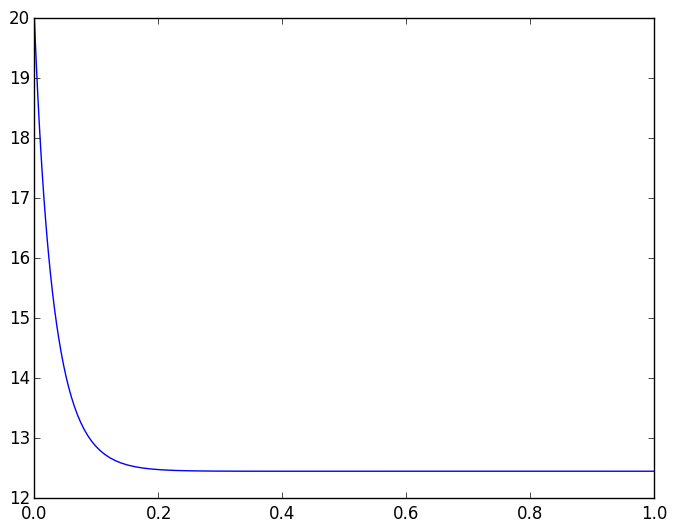

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f48eeb4fcf8>

In [10]:
N=90 #El numero de moleculas
dMdt(t,M)=2N-2M-M^20.0 #La ecuacuón diferencial
M0=20.0  #La condicion inicial de monomeros
tspan= [0:0.0001:1.0]  #El intervalo sobre el que resolveremos

#Aqui resolvemos la ecuación con ode23 que resulver hasta 2° y 3° orden
tout, Mout = ode23(dMdt, M0, tspan)
plot(tout, Mout)

In [12]:
Mout[end]

12.453599129458032

###Se puede ver que se estabiliza en el mismo valor con una exactitud de 3 cifras significativas q claro q dependen de la definción de nuestro intervalo.
###Ahora hagámos lo mismo para N=2, en este caso se deberia de estabilizar en $M=1.236$

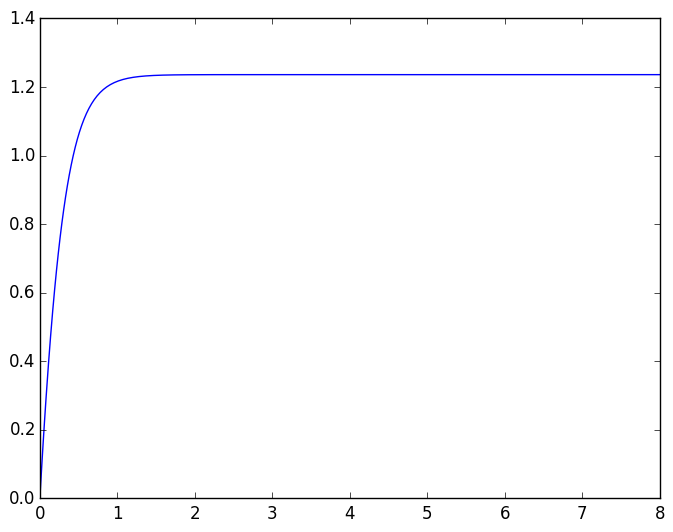

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f48ed50c940>

In [20]:
N=2.0
dMdt(t,M)=2N-2M-M^2
M0=0.0
tspan= [0:0.1:8.0]

tout, Mout = ode23(dMdt, M0, tspan)
plot(tout, Mout)

In [19]:
Mout[end]

1.2360723257692803

###Se puede ver que se tiende como siempre al equilibrio, pero en un escenario real debería de haber grandes fluctuaciones cuando no hay tantas moleculas. A estas se les llama *shot noise* q se traduce a ruido de disparo.
###Así que lo que vamos a hacer es trabajar de manera estocástica.

###En este caso usaremos el algoritmo Montecarlo de tiempo continuo. En este algoritmo se quita la inconveniencia de hacer el step muy pequeño, utilizando una distribución de probabilidades continua para el siguiente tiempo de ocurrencia de un evento.
###Muy burdamente se parte de que la probabilidad de que no suceda un evento en un tiempo $\Delta t$ desde el tiempo $t$ es $ P_0(t+\Delta t)=P_0(t)(1-a \Delta t) $ de ahí se hace tender $\Delta t \rightarrow 0$ y, usando la independencia de eventos se llega  una ecuación diferencial. 
###Tomando en cuenta que puede haber mas de un evento evento se llega a la sigueinte distribucion de probabilidad para cuando ocurre el siguiente evento$t$. $$P(t)=\lambda \exp{-\lambda t}$$
###Donde $\lambda=\sum{l_i}$ Y $l_i$ es la razón de cada evento.

###En este caso tenemos dos reacciones $l_1=1/2 k_b M (M-1)$ y $l_2=k_u D$

###Asi que el algoritmo lo que hace es obtener la $\lambda$ del sistema en su estado actual. Escoger el tiempo de la siguiente reacción. Y cual es 

Sacar la inversa de $G*e^{-G*t}$: $$y=G*e^{-G*t} \iff \frac{y}{G}= e^{-G*t} \iff \ln{\frac{y}{G}}=-G*t \iff t=-\frac{\ln{\frac{y}{G}}}{G}$$

In [13]:
function random_t_espera(λ::Float64)
    -log( rand()/λ ) / λ
end

random_t_espera (generic function with 1 method)